In [1]:
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt

In [2]:
#Test on generic data:
n = 300
d = 2

# Create a mixture of 2 Gaussians
mean1 = np.array([10, 10])
mean2 = np.array([-10, -10])
cov = np.array([[1, 0], [0, 1]])

data1 = np.random.multivariate_normal(mean1, cov, n // 2)
data2 = np.random.multivariate_normal(mean2, cov, n // 2)

data = np.vstack((data1, data2))

#Gaussian kernel
def k(x_i, x_j):
    return np.exp(-np.linalg.norm(x_i - x_j)**2)*100

def compute_kernel_matrix(data, k):
    n = len(data)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = k(data[i], data[j])
            
    return K

#K = compute_kernel_matrix(data, k)
#K = block matrix 1 top left 1 bottom right 0 everywhere else
K = np.zeros((n, n))
K[:n//2, :n//2] = 1
K[n//2:, n//2:] = 1

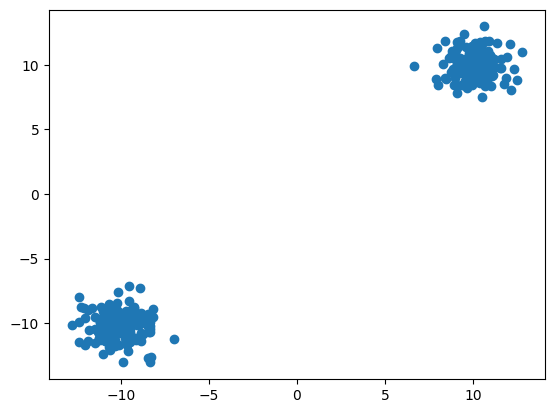

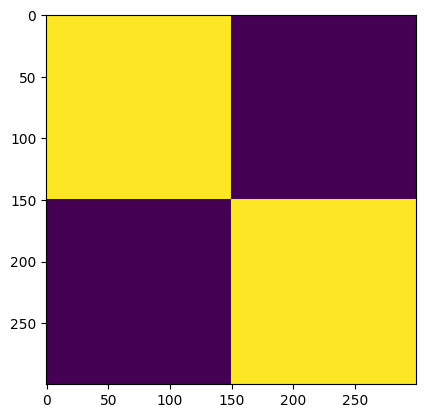

In [3]:
#plot data in r^2 space
plt.scatter(data[:, 0], data[:, 1])
#plot kernel matrix
plt.figure()
plt.imshow(K)


We want to sample from the distribution

$$ \mu_K (Y) = \frac{1}{Z_K} Tr(Y^\top Y K) $$

Where we know that, 

$$
Z_K = Tr(G K) 
$$

and 

$$
G = 2^{n-2} (J_n + I_n)
$$.


In [11]:
Z_K = 2**(n-2) * np.trace((np.ones((n,n)) + np.eye(n)) @ K)
def mu_K(K, Y):
    return np.trace(Y.T @ K @ Y) / Z_K

In [22]:
# Please note: Enumerating all 2^n (with n=300) possible vectors is not feasible in practice.
# Below is a simple illustration of the Alias Method setup for a small discrete distribution.

def build_alias_table(probabilities):
    """
    Build alias table for a given list of probabilities.
    """
    n = len(probabilities)
    alias = [0]*n
    prob = [p*n for p in probabilities]
    small, large = [], []

    for i, p in enumerate(prob):
        if p < 1.0:
            small.append(i)
        else:
            large.append(i)

    while small and large:
        s = small.pop()
        g = large.pop()
        alias[s] = g
        prob[g] = (prob[g] + prob[s]) - 1.0
        if prob[g] < 1.0:
            small.append(g)
        else:
            large.append(g)

    return prob, alias

def alias_draw(prob, alias):
    """
    Draw one sample from the alias table.
    """
    n = len(prob)
    i = np.random.randint(n)
    return i if np.random.rand() < prob[i] else alias[i]

def sample_alias_muK(K, Z_K, num_draws=1):
    """
    Example: For small n, if we had probabilities p(Y)=mu_K(K,Y) over all Y,
    we could build an alias table and sample. Not feasible for n=300 in practice.
    """
    # This is just a placeholder showing where you'd compute all p(Y).
    # Actual enumeration for n=300 is not practical.
    example_probs = [0.5, 0.5]  # Dummy example
    prob, alias = build_alias_table(example_probs)

    samples_alias = []
    for _ in range(num_draws):
        index = alias_draw(prob, alias)
        # Convert index to some Y here in a small example
        samples_alias.append(index)

    return samples_alias

100%|██████████| 10000/10000 [00:07<00:00, 1339.74it/s]


In [23]:
samples

array([], dtype=float64)

In [18]:
mu_K(K, sample_unif())

samples = []
num_samples = 10000000
for _ in trange(num_samples):
    Y = sample_unif()
    if np.random.rand() < mu_K(K, Y):
        samples.append(Y)

samples = np.array(samples)

  1%|          | 58476/10000000 [00:04<12:19, 13447.73it/s]


KeyboardInterrupt: 

In [19]:
samples

[]